In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression

# Set random seed for reproducibility
np.random.seed(42)

# Create a regression dataset
X, y = make_regression(n_samples=1000, n_features=10, noise=0.2)

# Convert to DataFrame
df = pd.DataFrame(X, columns=[f"feature_{i}" for i in range(10)])
df['target'] = y

# Add categorical feature
df['categorical_feature'] = np.random.choice(['A', 'B', 'C', 'D'], size=df.shape[0])

# Add missing values
nan_indices = np.random.choice(df.index, size=50, replace=False)
df.loc[nan_indices, 'feature_1'] = np.nan

# Add outliers
outlier_indices = np.random.choice(df.index, size=10, replace=False)
df.loc[outlier_indices, 'target'] *= 10

# Add multicollinearity
df['feature_10'] = df['feature_0'] * 0.8 + np.random.normal(0, 0.1, size=df.shape[0])

# Save dataset to CSV
# df.to_csv('regression_dataset.csv', index=False)

# Show dataset
df.head()


,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,target,categorical_feature,feature_10
0,1.575876,0.891863,-0.726774,-0.047799,-0.657035,-1.113295,-0.877617,0.994558,-0.299696,-0.761760,-62.916663,D,1.022579
1,0.535459,1.266661,-1.779875,1.209010,-0.113158,-0.971062,1.064171,-0.555273,0.741320,-0.987523,108.590303,A,0.366146
2,-0.686279,0.157128,0.145836,-1.432671,-0.666849,0.176190,0.585299,0.197917,-0.404362,-0.607472,-115.463999,B,-0.685073
3,0.925282,0.395914,0.676357,0.168651,1.574147,-0.117172,-0.037687,-0.345907,0.895796,-0.837381,36.542666,C,0.551797
4,-0.558922,1.073632,1.565524,0.377212,0.132970,-1.026515,-0.065750,-0.700121,-1.523187,1.195047,130.980034,B,-0.524007


In [3]:
df.columns=['a','b','c','d','e','f','g','h','i','j','target','l','m']
df

,a,b,c,d,e,f,g,h,i,j,target,l,m
0,1.575876,0.891863,-0.726774,-0.047799,-0.657035,-1.113295,-0.877617,0.994558,-0.299696,-0.761760,-62.916663,D,1.022579
1,0.535459,1.266661,-1.779875,1.209010,-0.113158,-0.971062,1.064171,-0.555273,0.741320,-0.987523,108.590303,A,0.366146
2,-0.686279,0.157128,0.145836,-1.432671,-0.666849,0.176190,0.585299,0.197917,-0.404362,-0.607472,-115.463999,B,-0.685073
3,0.925282,0.395914,0.676357,0.168651,1.574147,-0.117172,-0.037687,-0.345907,0.895796,-0.837381,36.542666,C,0.551797
4,-0.558922,1.073632,1.565524,0.377212,0.132970,-1.026515,-0.065750,-0.700121,-1.523187,1.195047,130.980034,B,-0.524007
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.197338,NaN,-0.194908,-0.151273,0.521122,0.285554,1.133770,0.645216,0.089581,0.555604,106.612033,C,-0.071846
996,-0.987866,1.597397,0.085513,0.723038,-0.654770,0.644690,-1.715708,-0.510608,0.320930,0.079915,-52.641948,B,-0.757793
997,0.427963,-0.833598,1.639257,1.723075,-0.795970,-0.679889,-1.922772,0.191890,-0.555286,-0.160560,-4.580577,B,0.373811
998,-0.273729,-1.380599,0.149598,-0.014270,-0.257620,-0.436155,0.097827,-0.069633,-0.683634,0.689164,-13.223743,C,-0.074370


In [4]:
df.describe()

,a,b,c,d,e,f,g,h,i,j,target,m
count,1000.000000,950.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.002689,0.004936,-0.023104,0.005495,-0.022542,0.031292,0.038105,-0.043075,-0.029252,0.013622,-2.986127,-0.003197
std,1.031230,1.000519,0.986846,1.030962,0.983366,1.016046,0.945284,0.983406,1.037024,1.012645,189.040927,0.822751
min,-2.801912,-3.922400,-3.007632,-3.601085,-3.241267,-3.688365,-3.176704,-2.943142,-3.170426,-3.138515,-2633.466242,-2.412782
25%,-0.744779,-0.624957,-0.650034,-0.713176,-0.702626,-0.631506,-0.559290,-0.750008,-0.749592,-0.651541,-79.610259,-0.583057
50%,-0.024976,0.009440,-0.003221,-0.013284,-0.015036,0.007605,0.019097,-0.001346,-0.012086,-0.012020,5.763456,-0.025107
75%,0.683319,0.669369,0.608861,0.696602,0.613766,0.685621,0.687027,0.638310,0.680087,0.721896,93.700104,0.534690
max,3.243093,3.076860,3.377383,3.137749,3.152057,3.529055,3.852731,3.117681,3.926238,2.935658,1135.159674,2.616247


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       1000 non-null   float64
 1   b       950 non-null    float64
 2   c       1000 non-null   float64
 3   d       1000 non-null   float64
 4   e       1000 non-null   float64
 5   f       1000 non-null   float64
 6   g       1000 non-null   float64
 7   h       1000 non-null   float64
 8   i       1000 non-null   float64
 9   j       1000 non-null   float64
 10  target  1000 non-null   float64
 11  l       1000 non-null   object 
 12  m       1000 non-null   float64
dtypes: float64(12), object(1)
memory usage: 101.7+ KB


In [6]:
df.isnull().sum()

a          0
b         50
c          0
d          0
e          0
f          0
g          0
h          0
i          0
j          0
target     0
l          0
m          0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df['new']=df.drop('l',axis=1).sum(axis=1)
df

,a,b,c,d,e,f,g,h,i,j,target,l,m,new
0,1.575876,0.891863,-0.726774,-0.047799,-0.657035,-1.113295,-0.877617,0.994558,-0.299696,-0.761760,-62.916663,D,1.022579,-62.915764
1,0.535459,1.266661,-1.779875,1.209010,-0.113158,-0.971062,1.064171,-0.555273,0.741320,-0.987523,108.590303,A,0.366146,109.366178
2,-0.686279,0.157128,0.145836,-1.432671,-0.666849,0.176190,0.585299,0.197917,-0.404362,-0.607472,-115.463999,B,-0.685073,-118.684335
3,0.925282,0.395914,0.676357,0.168651,1.574147,-0.117172,-0.037687,-0.345907,0.895796,-0.837381,36.542666,C,0.551797,40.392462
4,-0.558922,1.073632,1.565524,0.377212,0.132970,-1.026515,-0.065750,-0.700121,-1.523187,1.195047,130.980034,B,-0.524007,130.925916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,-1.571152,-0.227720,0.037542,1.081514,-1.399078,0.715493,1.091805,-1.520287,1.006730,0.450963,120.306040,C,-1.383849,118.588001
996,-0.987866,1.597397,0.085513,0.723038,-0.654770,0.644690,-1.715708,-0.510608,0.320930,0.079915,-52.641948,B,-0.757793,-53.817209
997,0.427963,-0.833598,1.639257,1.723075,-0.795970,-0.679889,-1.922772,0.191890,-0.555286,-0.160560,-4.580577,B,0.373811,-5.172657
998,-0.273729,-1.380599,0.149598,-0.014270,-0.257620,-0.436155,0.097827,-0.069633,-0.683634,0.689164,-13.223743,C,-0.074370,-15.477166


In [9]:
df.drop(['d','e'],axis=1)


,a,b,c,f,g,h,i,j,target,l,m,new
0,1.575876,0.891863,-0.726774,-1.113295,-0.877617,0.994558,-0.299696,-0.761760,-62.916663,D,1.022579,-62.915764
1,0.535459,1.266661,-1.779875,-0.971062,1.064171,-0.555273,0.741320,-0.987523,108.590303,A,0.366146,109.366178
2,-0.686279,0.157128,0.145836,0.176190,0.585299,0.197917,-0.404362,-0.607472,-115.463999,B,-0.685073,-118.684335
3,0.925282,0.395914,0.676357,-0.117172,-0.037687,-0.345907,0.895796,-0.837381,36.542666,C,0.551797,40.392462
4,-0.558922,1.073632,1.565524,-1.026515,-0.065750,-0.700121,-1.523187,1.195047,130.980034,B,-0.524007,130.925916
...,...,...,...,...,...,...,...,...,...,...,...,...
993,-1.571152,-0.227720,0.037542,0.715493,1.091805,-1.520287,1.006730,0.450963,120.306040,C,-1.383849,118.588001
996,-0.987866,1.597397,0.085513,0.644690,-1.715708,-0.510608,0.320930,0.079915,-52.641948,B,-0.757793,-53.817209
997,0.427963,-0.833598,1.639257,-0.679889,-1.922772,0.191890,-0.555286,-0.160560,-4.580577,B,0.373811,-5.172657
998,-0.273729,-1.380599,0.149598,-0.436155,0.097827,-0.069633,-0.683634,0.689164,-13.223743,C,-0.074370,-15.477166


In [10]:
df.target.value_counts()

-62.916663     1
 105.935689    1
-131.254475    1
 180.124585    1
 108.222410    1
              ..
-79.598345     1
 110.588991    1
 34.191428     1
 34.386286     1
-76.541450     1
Name: target, Length: 950, dtype: int64

In [11]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [12]:
s=StandardScaler()
n=MinMaxScaler()

In [13]:
x=df.drop('l',axis=1)
y=x

<Axes: >

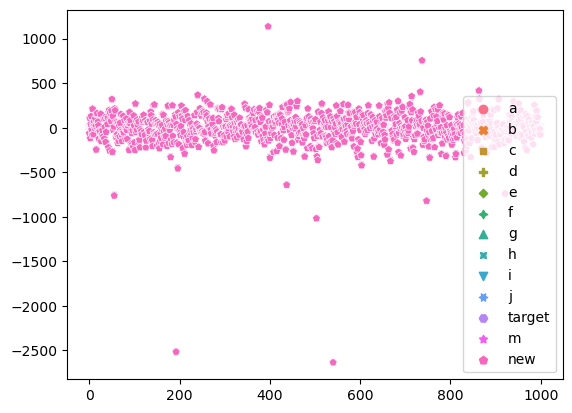

In [14]:
sns.scatterplot(x)

In [15]:
s_trans=s.fit_transform(x)
n_trans=n.fit_transform(x)


In [16]:
s1=pd.DataFrame(s_trans)
s1

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.528984,0.886934,-0.710251,-0.049816,-0.642161,-1.111182,-0.973222,1.052722,-0.254121,-0.750834,-0.306434,1.245799,-0.302893
1,0.518735,1.261736,-1.778448,1.168832,-0.091360,-0.970931,1.077130,-0.516161,0.753626,-0.972910,0.587324,0.446329,0.585501
2,-0.667576,0.152193,0.174867,-1.392639,-0.652099,0.160336,0.571485,0.246287,-0.355442,-0.599065,-0.580270,-0.833952,-0.590471
3,0.897255,0.390982,0.712993,0.160062,1.617425,-0.128938,-0.086332,-0.304222,0.903165,-0.825219,0.211869,0.672433,0.229829
4,-0.543912,1.068704,1.614905,0.362290,0.157901,-1.025612,-0.115964,-0.662790,-1.438510,1.174025,0.704002,-0.637790,0.696677
...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,-1.526791,-0.232657,0.065020,1.045208,-1.393651,0.692125,1.106309,-1.493038,1.010554,0.442090,0.648377,-1.684992,0.633055
946,-0.960418,1.592474,0.113680,0.697616,-0.639867,0.622309,-1.858170,-0.470948,0.346671,0.077100,-0.252891,-0.922518,-0.255975
947,0.414356,-0.838541,1.689695,1.667288,-0.782865,-0.683814,-2.076811,0.240186,-0.501542,-0.159449,-0.002433,0.455664,-0.005133
948,-0.266989,-1.385545,0.178683,-0.017306,-0.237662,-0.443477,0.056758,-0.024552,-0.625789,0.676402,-0.047474,-0.090176,-0.058270


In [17]:
s2=pd.DataFrame(n_trans)
s2

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.724199,0.687825,0.357220,0.527285,0.404208,0.356785,0.327066,0.649697,0.404518,0.391289,0.682092,0.683106,0.682001
1,0.552087,0.741373,0.192287,0.713788,0.489277,0.376492,0.603302,0.393984,0.551209,0.354121,0.727601,0.552577,0.727667
2,0.349980,0.582851,0.493886,0.321779,0.402673,0.535448,0.535179,0.518256,0.389770,0.416689,0.668149,0.343547,0.667219
3,0.616574,0.616967,0.576974,0.559405,0.753194,0.494802,0.446553,0.428528,0.572977,0.378839,0.708483,0.589493,0.709384
4,0.371048,0.713794,0.716233,0.590354,0.527775,0.368809,0.442561,0.370085,0.232115,0.713441,0.733542,0.375575,0.733381
...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,0.203599,0.527867,0.476925,0.694868,0.288143,0.610171,0.607234,0.234763,0.588608,0.590941,0.730710,0.204599,0.730111
946,0.300090,0.788626,0.484438,0.641672,0.404562,0.600361,0.207840,0.401354,0.491971,0.529855,0.684818,0.329087,0.684413
947,0.534305,0.441304,0.727780,0.790071,0.382477,0.416835,0.178383,0.517262,0.368503,0.490265,0.697571,0.554102,0.697306
948,0.418227,0.363153,0.494475,0.532260,0.466682,0.450606,0.465831,0.474112,0.350417,0.630156,0.695278,0.464983,0.694575


In [18]:
s2.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000
mean,0.463712,0.561107,0.466886,0.534909,0.503388,0.512919,0.458184,0.478114,0.441509,0.516951,0.697695,0.479706,0.697570
std,0.170456,0.142946,0.154485,0.153121,0.154528,0.140585,0.134797,0.163076,0.145640,0.167452,0.050946,0.163355,0.051430
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.337385,0.471113,0.366000,0.427776,0.399537,0.419492,0.373518,0.360418,0.340739,0.408611,0.677337,0.363574,0.676918
50%,0.461334,0.561751,0.470541,0.531418,0.503952,0.510825,0.454681,0.484785,0.445046,0.511554,0.700202,0.476492,0.700327
75%,0.576960,0.656036,0.566443,0.638044,0.604663,0.603651,0.549618,0.589243,0.540898,0.635065,0.723656,0.585588,0.723889
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
s1.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,9.500000e+02,9.500000e+02,9.500000e+02,9.500000e+02,9.500000e+02,9.500000e+02,9.500000e+02,9.500000e+02,9.500000e+02,9.500000e+02,9.500000e+02,9.500000e+02,9.500000e+02
mean,-2.711281e-17,-1.028417e-17,3.739699e-18,-5.609548e-18,1.495879e-17,-3.552714e-17,-1.495879e-17,7.479397e-18,-3.739699e-18,1.869849e-18,-7.479397e-18,1.215402e-17,-1.121910e-17
std,1.000527e+00,1.000527e+00,1.000527e+00,1.000527e+00,1.000527e+00,1.000527e+00,1.000527e+00,1.000527e+00,1.000527e+00,1.000527e+00,1.000527e+00,1.000527e+00,1.000527e+00
min,-2.721862e+00,-3.927367e+00,-3.023804e+00,-3.495213e+00,-3.259292e+00,-3.650374e+00,-3.400849e+00,-2.933384e+00,-3.033106e+00,-3.088783e+00,-1.370211e+01,-2.938131e+00,-1.357075e+01
25%,-7.415044e-01,-6.298979e-01,-6.533936e-01,-7.000322e-01,-6.724012e-01,-6.649112e-01,-6.284314e-01,-7.221029e-01,-6.922781e-01,-6.473324e-01,-3.998151e-01,-7.112942e-01,-4.017857e-01
50%,-1.396294e-02,4.504710e-03,2.367345e-02,-2.280935e-02,3.652402e-03,-1.490180e-02,-2.600603e-02,4.092902e-02,2.429793e-02,-3.224917e-02,4.922403e-02,-1.968538e-02,5.363597e-02
75%,6.647334e-01,6.644382e-01,6.447847e-01,6.739078e-01,6.557299e-01,6.457293e-01,6.786573e-01,6.818162e-01,6.827870e-01,7.057319e-01,5.098542e-01,6.485134e-01,5.120101e-01
max,3.147857e+00,3.071949e+00,3.452736e+00,3.039008e+00,3.215423e+00,3.466486e+00,4.021597e+00,3.201945e+00,3.836758e+00,2.886218e+00,5.936992e+00,3.186729e+00,5.883561e+00


<Axes: >

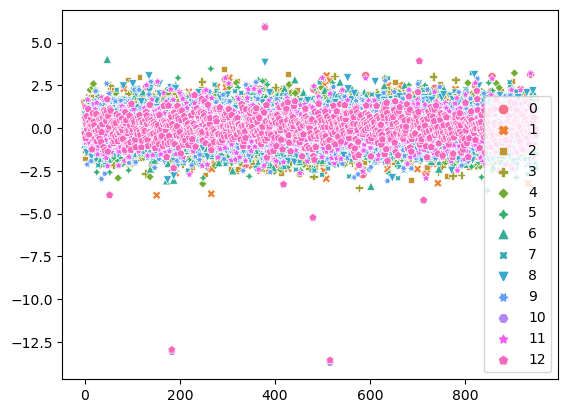

In [20]:
sns.scatterplot(s1)

<Axes: >

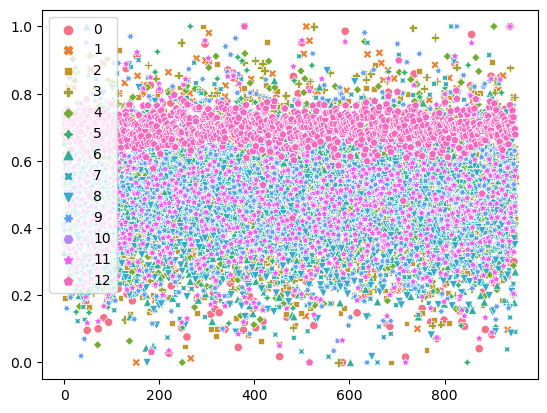

In [21]:
sns.scatterplot(s2)

In [22]:
df

,a,b,c,d,e,f,g,h,i,j,target,l,m,new
0,1.575876,0.891863,-0.726774,-0.047799,-0.657035,-1.113295,-0.877617,0.994558,-0.299696,-0.761760,-62.916663,D,1.022579,-62.915764
1,0.535459,1.266661,-1.779875,1.209010,-0.113158,-0.971062,1.064171,-0.555273,0.741320,-0.987523,108.590303,A,0.366146,109.366178
2,-0.686279,0.157128,0.145836,-1.432671,-0.666849,0.176190,0.585299,0.197917,-0.404362,-0.607472,-115.463999,B,-0.685073,-118.684335
3,0.925282,0.395914,0.676357,0.168651,1.574147,-0.117172,-0.037687,-0.345907,0.895796,-0.837381,36.542666,C,0.551797,40.392462
4,-0.558922,1.073632,1.565524,0.377212,0.132970,-1.026515,-0.065750,-0.700121,-1.523187,1.195047,130.980034,B,-0.524007,130.925916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,-1.571152,-0.227720,0.037542,1.081514,-1.399078,0.715493,1.091805,-1.520287,1.006730,0.450963,120.306040,C,-1.383849,118.588001
996,-0.987866,1.597397,0.085513,0.723038,-0.654770,0.644690,-1.715708,-0.510608,0.320930,0.079915,-52.641948,B,-0.757793,-53.817209
997,0.427963,-0.833598,1.639257,1.723075,-0.795970,-0.679889,-1.922772,0.191890,-0.555286,-0.160560,-4.580577,B,0.373811,-5.172657
998,-0.273729,-1.380599,0.149598,-0.014270,-0.257620,-0.436155,0.097827,-0.069633,-0.683634,0.689164,-13.223743,C,-0.074370,-15.477166


In [23]:
xx=pd.concat([s1,df['l']],axis=1)
xx

,0,1,2,3,4,5,6,7,8,9,10,11,12,l
0,1.528984,0.886934,-0.710251,-0.049816,-0.642161,-1.111182,-0.973222,1.052722,-0.254121,-0.750834,-0.306434,1.245799,-0.302893,D
1,0.518735,1.261736,-1.778448,1.168832,-0.091360,-0.970931,1.077130,-0.516161,0.753626,-0.972910,0.587324,0.446329,0.585501,A
2,-0.667576,0.152193,0.174867,-1.392639,-0.652099,0.160336,0.571485,0.246287,-0.355442,-0.599065,-0.580270,-0.833952,-0.590471,B
3,0.897255,0.390982,0.712993,0.160062,1.617425,-0.128938,-0.086332,-0.304222,0.903165,-0.825219,0.211869,0.672433,0.229829,C
4,-0.543912,1.068704,1.614905,0.362290,0.157901,-1.025612,-0.115964,-0.662790,-1.438510,1.174025,0.704002,-0.637790,0.696677,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B
998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C


In [24]:
xx=xx.drop_duplicates()
xx.shape

(954, 14)

In [25]:
df1=df.select_dtypes(exclude='object')

In [26]:
from scipy import stats
# df1=df.select_dtypes(exclude='object')
for i in df1.columns:
        a=df1[i].quantile(0.25)
        b=df1[i].quantile(0.75)
        iqr=b-a
        u=a-1.5*iqr
        l=b+1.5*iqr
        df1=df1[~((df1[i]<u) | (df1[i]>l))]
    

<Axes: >

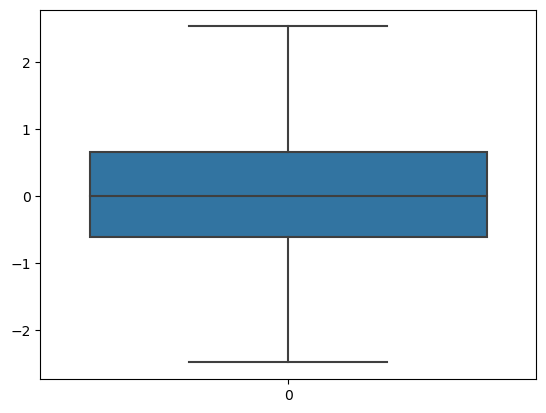

In [27]:
sns.boxplot(df1.b)

In [28]:
df1

,a,b,c,d,e,f,g,h,i,j,target,m,new
0,1.575876,0.891863,-0.726774,-0.047799,-0.657035,-1.113295,-0.877617,0.994558,-0.299696,-0.761760,-62.916663,1.022579,-62.915764
1,0.535459,1.266661,-1.779875,1.209010,-0.113158,-0.971062,1.064171,-0.555273,0.741320,-0.987523,108.590303,0.366146,109.366178
2,-0.686279,0.157128,0.145836,-1.432671,-0.666849,0.176190,0.585299,0.197917,-0.404362,-0.607472,-115.463999,-0.685073,-118.684335
3,0.925282,0.395914,0.676357,0.168651,1.574147,-0.117172,-0.037687,-0.345907,0.895796,-0.837381,36.542666,0.551797,40.392462
4,-0.558922,1.073632,1.565524,0.377212,0.132970,-1.026515,-0.065750,-0.700121,-1.523187,1.195047,130.980034,-0.524007,130.925916
...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,-1.571152,-0.227720,0.037542,1.081514,-1.399078,0.715493,1.091805,-1.520287,1.006730,0.450963,120.306040,-1.383849,118.588001
996,-0.987866,1.597397,0.085513,0.723038,-0.654770,0.644690,-1.715708,-0.510608,0.320930,0.079915,-52.641948,-0.757793,-53.817209
997,0.427963,-0.833598,1.639257,1.723075,-0.795970,-0.679889,-1.922772,0.191890,-0.555286,-0.160560,-4.580577,0.373811,-5.172657
998,-0.273729,-1.380599,0.149598,-0.014270,-0.257620,-0.436155,0.097827,-0.069633,-0.683634,0.689164,-13.223743,-0.074370,-15.477166


In [29]:
x=df.select_dtypes(exclude='object')
for i in x.columns:
#     if df:
        print(i)

a
b
c
d
e
f
g
h
i
j
target
m
new


In [30]:
df

,a,b,c,d,e,f,g,h,i,j,target,l,m,new
0,1.575876,0.891863,-0.726774,-0.047799,-0.657035,-1.113295,-0.877617,0.994558,-0.299696,-0.761760,-62.916663,D,1.022579,-62.915764
1,0.535459,1.266661,-1.779875,1.209010,-0.113158,-0.971062,1.064171,-0.555273,0.741320,-0.987523,108.590303,A,0.366146,109.366178
2,-0.686279,0.157128,0.145836,-1.432671,-0.666849,0.176190,0.585299,0.197917,-0.404362,-0.607472,-115.463999,B,-0.685073,-118.684335
3,0.925282,0.395914,0.676357,0.168651,1.574147,-0.117172,-0.037687,-0.345907,0.895796,-0.837381,36.542666,C,0.551797,40.392462
4,-0.558922,1.073632,1.565524,0.377212,0.132970,-1.026515,-0.065750,-0.700121,-1.523187,1.195047,130.980034,B,-0.524007,130.925916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,-1.571152,-0.227720,0.037542,1.081514,-1.399078,0.715493,1.091805,-1.520287,1.006730,0.450963,120.306040,C,-1.383849,118.588001
996,-0.987866,1.597397,0.085513,0.723038,-0.654770,0.644690,-1.715708,-0.510608,0.320930,0.079915,-52.641948,B,-0.757793,-53.817209
997,0.427963,-0.833598,1.639257,1.723075,-0.795970,-0.679889,-1.922772,0.191890,-0.555286,-0.160560,-4.580577,B,0.373811,-5.172657
998,-0.273729,-1.380599,0.149598,-0.014270,-0.257620,-0.436155,0.097827,-0.069633,-0.683634,0.689164,-13.223743,C,-0.074370,-15.477166


In [33]:
df.drop_duplicates(inplace=True)
df.shape

(950, 14)

In [39]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,accuracy_score,classification_report,
f1_score,precision_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor


In [50]:
df=pd.get_dummies(df)
df

,a,b,c,d,e,f,g,h,i,j,target,m,new,l_A,l_B,l_C,l_D
0,1.575876,0.891863,-0.726774,-0.047799,-0.657035,-1.113295,-0.877617,0.994558,-0.299696,-0.761760,-62.916663,1.022579,-62.915764,0,0,0,1
1,0.535459,1.266661,-1.779875,1.209010,-0.113158,-0.971062,1.064171,-0.555273,0.741320,-0.987523,108.590303,0.366146,109.366178,1,0,0,0
2,-0.686279,0.157128,0.145836,-1.432671,-0.666849,0.176190,0.585299,0.197917,-0.404362,-0.607472,-115.463999,-0.685073,-118.684335,0,1,0,0
3,0.925282,0.395914,0.676357,0.168651,1.574147,-0.117172,-0.037687,-0.345907,0.895796,-0.837381,36.542666,0.551797,40.392462,0,0,1,0
4,-0.558922,1.073632,1.565524,0.377212,0.132970,-1.026515,-0.065750,-0.700121,-1.523187,1.195047,130.980034,-0.524007,130.925916,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,-1.571152,-0.227720,0.037542,1.081514,-1.399078,0.715493,1.091805,-1.520287,1.006730,0.450963,120.306040,-1.383849,118.588001,0,0,1,0
996,-0.987866,1.597397,0.085513,0.723038,-0.654770,0.644690,-1.715708,-0.510608,0.320930,0.079915,-52.641948,-0.757793,-53.817209,0,1,0,0
997,0.427963,-0.833598,1.639257,1.723075,-0.795970,-0.679889,-1.922772,0.191890,-0.555286,-0.160560,-4.580577,0.373811,-5.172657,0,1,0,0
998,-0.273729,-1.380599,0.149598,-0.014270,-0.257620,-0.436155,0.097827,-0.069633,-0.683634,0.689164,-13.223743,-0.074370,-15.477166,0,0,1,0


In [53]:
x=df.drop('target',axis=1)
y=df.target


In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
models={
    'LinearRegression':LinearRegression(),
    'DecisionTreeRegressor':DecisionTreeRegressor(),
    'RandomForestRegressor':RandomForestRegressor(),
    'KNeighborsRegressor':KNeighborsRegressor(),
    'SVR':SVR()
    
}

for i,j in models.items():
    j.fit(x_train,y_train)
    print(j.score(x_train,y_train))
    print(j.score(x_test,y_test))
    print("---------------------------------------------")

1.0
1.0
---------------------------------------------
1.0
0.9986183537039094
---------------------------------------------
0.9904543370397836
0.9986798688280487
---------------------------------------------
0.9211540504090109
0.9994113426453836
---------------------------------------------
0.33642944583454426
0.7832906984002631
---------------------------------------------


In [71]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
x_train.shape

(760, 16)

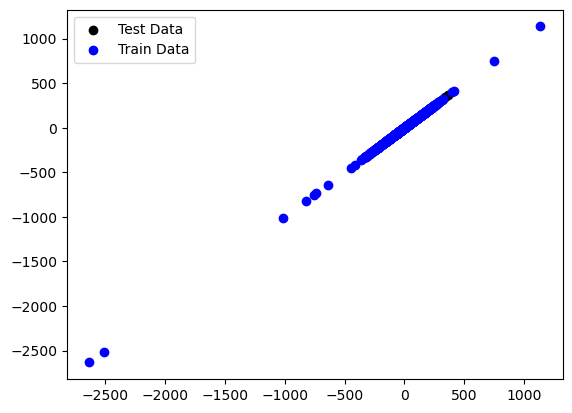

In [77]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
model=LinearRegression()
model.fit(x_train,y_train)
y_train_pred=model.predict(x_train)
y_test_pred=model.predict(x_test)
plt.scatter(y_test, y_test_pred, color='black', label='Test Data')
plt.scatter(y_train, y_train_pred, color='blue', label='Train Data')
# plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', lw=2, linestyle='--', label='Ideal Fit')
# plt.scatter(x_train,y_train,color='blue',label='Train')
# plt.scatter(x_test,y_test,color='orange',label='Test')
# plt.plot(x_train,y_train_pred,color='red',label='pred_train')
# plt.plot(x_train,y_test_pred,color='green',label='pred_test')
plt.legend()
plt.show()


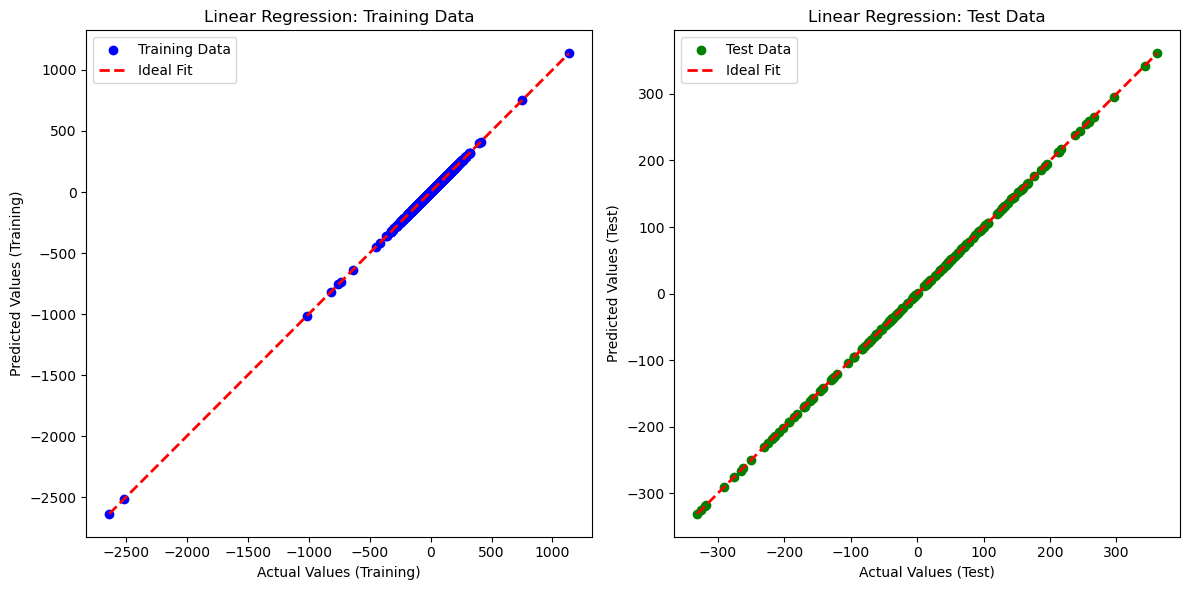

In [78]:
plt.figure(figsize=(12, 6))

# Plotting training data
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, color='blue', label='Training Data')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', lw=2, linestyle='--', label='Ideal Fit')
plt.xlabel('Actual Values (Training)')
plt.ylabel('Predicted Values (Training)')
plt.title('Linear Regression: Training Data')
plt.legend()

# Plotting test data
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, color='green', label='Test Data')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, linestyle='--', label='Ideal Fit')
plt.xlabel('Actual Values (Test)')
plt.ylabel('Predicted Values (Test)')
plt.title('Linear Regression: Test Data')
plt.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()